# Various efforts to explore and validate party embeddings

In [99]:
import pickle
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
from politician2vec import Politician2Vec
from politician2vec.utils import *
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset('iris')
plt.style.use('seaborn-whitegrid')

In [125]:
test_data_path = 'data/clean/combined/subset_party_imputed_v2.p'

In [126]:
with open(test_data_path, 'rb') as p:
    test_data = pickle.load(p)

test_data.shape

(349594, 7)

In [127]:
tw_data = test_data.loc[
    test_data['source'] == 'twitter'
]

In [132]:
grouped_docs = tw_data.groupby(['full_name', 'party'])['doc'].apply('. '.join).reset_index()

In [133]:
grouped_docs

,full_name,party,doc
0,Alex Vanopslagh,LA,Det offentlige forbrug er steget med 9 mia. kr...
1,Alternativet,ALT,RT @TFKortholm: Vi er klar til valgkampen 💚🖖 S...
2,Alternativets Unge,ALT,Vores super seje @OlumekoC er på den internati...
3,Anders Kronborg,S,RT @DSU_1920: Statsministeren underskriver DSU...
4,Andreas Steenberg,RV,"Hvad er egentlig @SorenPape, @KonservativeDK, ..."
...,...,...,...
161,Ulla Tørnæs,V,RT @JakobEllemann: Danskerne drømmer om at bo ...
162,Venstre,V,RT @AndreasBachM: 75.135 ‼️ gange tak til alle...
163,Venstres Ungdom,V,En borgerlig statsminister forudsætter et borg...
164,Yildiz Akdogan,S,"@JackPGB Ja, man får det dårligt 😔. Det her gø..."


In [91]:
model_path = 'embedding_models/politician2vec_test_deeplearn_v3.txt'

In [92]:
pol2vec_model, doc2vec_model = load_politician2vec_from_txt(model_path)

Loading Politician2Vec model...
Retrieving document embedding...
All done!


In [101]:
# FOR PLOTTING, I WILL PROBABLY HAVE TO UMAP POLITICIANS/PARTIES FIRST, AND THEN PROJECT WORDS ONTO THIS SPACE

In [100]:
colormap = {
    'S': '#C8042C',
    'V': '#1A4289',
    'DF': '#265BA4',
    'EL': '#BF2850',
    'SF': '#B42D27',
    'KF': '#24573E',
    'RV': '#D82E8A',
    'LA': '#E7B657',
    'ALT': '#75FB4C',
    'NB': '#1E4B57',
    'KD': '#566197',
    'FG': '#E4F04E',
    'DD': '#3470BC',
    'M': '#7A308B',
    'SIU': 'lightgrey',
    'UFG': 'lightgrey'
}

In [97]:
docvecs = pol2vec_model.document_vectors

In [219]:
mapper = umap.UMAP(
    n_neighbors=15,
    metric='cosine',
    n_components=2
    ).fit(
        docvecs
    )

In [223]:
grouped_docs['x'] = mapper.embedding_.T[0]
grouped_docs['y'] = mapper.embedding_.T[1]

In [242]:
parties_to_remove = [] #'M', 'KD', 'DD', 'FG'

plot_docs = grouped_docs.loc[~grouped_docs['party'].isin(parties_to_remove)]

In [244]:
plot_docs = plot_docs.groupby('party')['y'].agg('mean')

In [246]:
plot_docs.head()

party
ALT    11.778108
DD     13.679735
DF     15.091540
EL     12.176611
FG     11.725463
Name: y, dtype: float32

/Users/mathiasbruun/me/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mathiasbruun/me/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


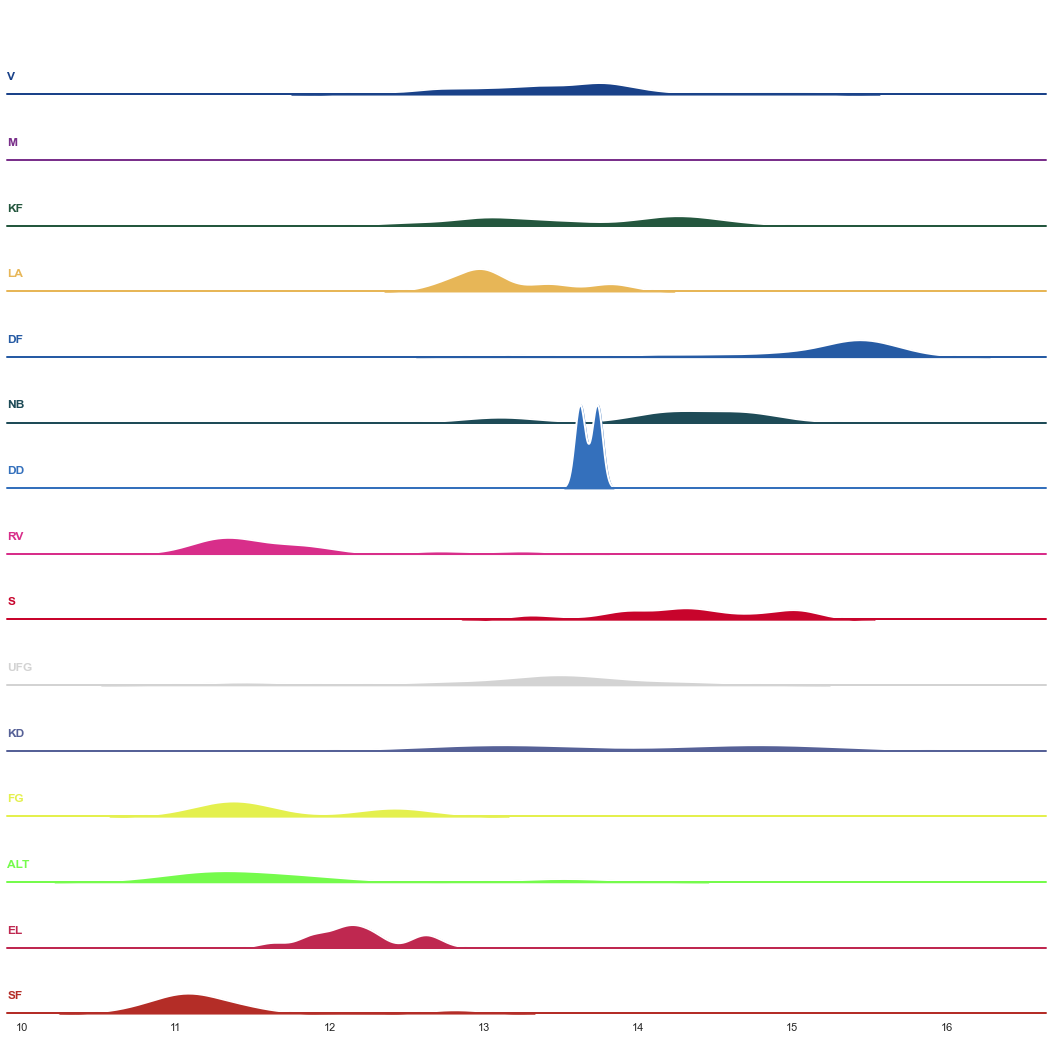

In [231]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, start=1, rot=-.25, light=.7)
g = sns.FacetGrid(plot_docs, row="party", hue="party", aspect=15, height=1, palette=colormap)

# Draw the densities in a few steps
g.map(sns.kdeplot, "y",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "y", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
# g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
g.map(plt.axhline, y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "y")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], xlabel="", ylabel="")
g.despine(bottom=True, left=True)
plt.show()

/Users/mathiasbruun/me/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1184: UserWarning: The following kwargs were not used by contour: 'warn_singular'
  **contour_kws,


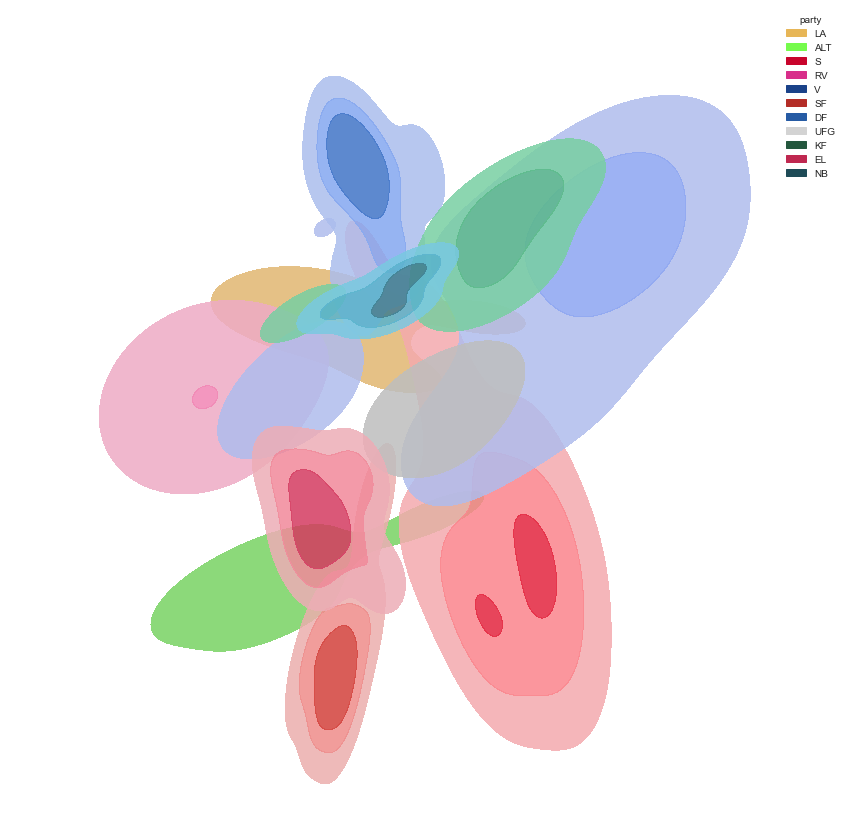

In [204]:
fig, ax = plt.subplots(figsize = (15,15))

sns.kdeplot(
    data = plot_docs,
    x = 'x',
    y = 'y',
    hue = 'party',
    palette = colormap,
    fill = True,
    thresh=0.1,
    ax = ax,
    alpha = .85,
    levels = 4,
    warn_singular = False
)

plt.axis('off')
plt.show()

In [11]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
